In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import subjectivity,stopwords
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.sentiment.util import extract_unigram_feats, mark_negation
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import random
import re
import io

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

exclude = set(string.punctuation)

In [3]:
Chat_tweets = pd.read_csv("Chat_tweets.csv")
print(Chat_tweets.shape)

(1500, 4)


In [4]:
#pip install textblob

     |████████████████████████████████| 636 kB 3.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
def remove_b_prefix(string):
    return string.lstrip('b')

Chat_tweets['cleaned_tweet'] = Chat_tweets['Text'].apply(remove_b_prefix)

In [5]:
def clean_tweet_text(tweet_text):
    pattern = r"(@[\w]+)|(#)|(https?://[A-Za-z0-9./]*)|([0-9]+|\n)|([^0-9A-Za-z!? \t])|(\w+:\/\/\S+)|('rt')"
    clean_text = re.sub(pattern, '', tweet_text)
    return clean_text.lower()

Chat_tweets['cleaned_tweet'] = Chat_tweets['cleaned_tweet'].apply(clean_tweet_text)

In [6]:
import string
from nltk.corpus import stopwords
my_stopwords=['i','im','is','am','are','was','he','she','me','you','your',
             'by','for','of','they','them','this','that','these','those',
             'what','how','where','why''the','a','an','and','has','had','have','be','in']

def preprocess_tweet_text(tweet_text):
    words = tweet_text.split()
    words = [word for word in words if word.lower() not in my_stopwords]
    words = ["".join(ch for ch in word if ch not in exclude) for word in words]
    clean_text = " ".join(words)    
    return clean_text
Chat_tweets['cleaned_tweet'] = Chat_tweets['cleaned_tweet'].apply(preprocess_tweet_text)

In [7]:
Chat_tweets.head(3)

,UserName,Datetime,Tweet Id,Text,cleaned_tweet
0,charis_ai,2022-11-30 23:56:04+00:00,1598103601507102720,"Overall, using AI to create art can expand the...",overall using ai to create art can expand the ...
1,anthonypak,2022-11-30 23:54:08+00:00,1598103115060084736,Just played around with OpenAI's new #ChatGPT ...,just played around with openais new chatgpt mo...
2,emargusity,2022-11-30 23:51:34+00:00,1598102468243599361,I asked #ChatGPT to write me a story about Sov...,asked chatgpt to write story about sova jett f...


In [8]:
Chat_tweets['cleaned_tweet'][0]

'overall using ai to create art can expand the boundaries creativity allow artists to explore new directions their work chatgpt'

In [9]:
Chat_tweets.dtypes

UserName         object
Datetime         object
Tweet Id          int64
Text             object
cleaned_tweet    object
dtype: object

In [25]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/satwikchowdaryinampudi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
sa = SentimentIntensityAnalyzer()

In [11]:
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()

def split(text):
    text = re.sub(r'[^\x00-\x7f]', r'', text) # remove non-ascii characters
    sentences = sent_tokenize(text)
    tokenized_sentences = [word_tokenize(sent) for sent in sentences]
    tokenized_sentences = [[lemma.lemmatize(token) for token in sent if token.isalnum()] for sent in tokenized_sentences]
    return tokenized_sentences

In [12]:
Chat_tweets['sentiment_rule'] = Chat_tweets.cleaned_tweet.apply(lambda x : sa.polarity_scores(x))
Chat_tweets['sentiment_rule']

0       {'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'comp...
1       {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...
2       {'neg': 0.116, 'neu': 0.58, 'pos': 0.304, 'com...
3       {'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'comp...
4       {'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...
                              ...                        
1495    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1496    {'neg': 0.243, 'neu': 0.757, 'pos': 0.0, 'comp...
1497    {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...
1498    {'neg': 0.158, 'neu': 0.443, 'pos': 0.399, 'co...
1499    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: sentiment_rule, Length: 1500, dtype: object

In [13]:
def vader_compound(senti):
    if senti['compound'] >= 0.05:
        return "Positive"
    elif senti['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [14]:
Chat_tweets['sentiment_compound'] = Chat_tweets['sentiment_rule'].apply(lambda x: vader_compound(x))
Chat_tweets.head()

,UserName,Datetime,Tweet Id,Text,cleaned_tweet,sentiment_rule,sentiment_compound
0,charis_ai,2022-11-30 23:56:04+00:00,1598103601507102720,"Overall, using AI to create art can expand the...",overall using ai to create art can expand the ...,"{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'comp...",Positive
1,anthonypak,2022-11-30 23:54:08+00:00,1598103115060084736,Just played around with OpenAI's new #ChatGPT ...,just played around with openais new chatgpt mo...,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp...",Positive
2,emargusity,2022-11-30 23:51:34+00:00,1598102468243599361,I asked #ChatGPT to write me a story about Sov...,asked chatgpt to write story about sova jett f...,"{'neg': 0.116, 'neu': 0.58, 'pos': 0.304, 'com...",Positive
3,gpeters,2022-11-30 23:51:25+00:00,1598102431073959936,OpenAI's new ChatGPT is very good at creative ...,openais new chatgpt very good at creative writ...,"{'neg': 0.0, 'neu': 0.611, 'pos': 0.389, 'comp...",Positive
4,ArashSaeidpour,2022-11-30 23:47:22+00:00,1598101410100674560,This is a great improvement! Unlike text-davin...,great improvement unlike textdavinci chatgpt u...,"{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...",Positive


In [15]:
Chat_tweets.sentiment_compound.value_counts()

Positive    761
Neutral     468
Negative    271
Name: sentiment_compound, dtype: int64

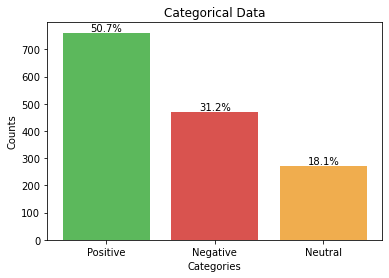

In [16]:

# Data
categories = ['Positive', 'Negative', 'Neutral']
counts = [761, 468, 271]
colors = ['#5cb85c', '#d9534f', '#f0ad4e']

# Calculate percentages
total = sum(counts)
percentages = [count/total*100 for count in counts]

# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(categories, counts, color=colors)

# Add percentages to the bars
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'{percentages[i]:.1f}%', ha='center', va='bottom')

# Add labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Categorical Data')

# Show the chart
plt.show()

In [17]:
Chat_tweets.columns

Index(['UserName', 'Datetime', 'Tweet Id', 'Text', 'cleaned_tweet',
       'sentiment_rule', 'sentiment_compound'],
      dtype='object')

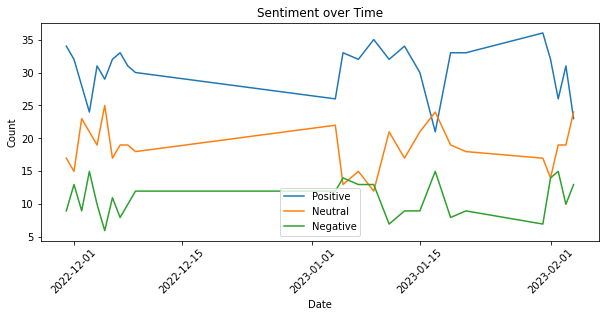

In [19]:
Chat_tweets['date'] = pd.to_datetime(Chat_tweets['Datetime']).dt.date
sentiment_df = Chat_tweets[['sentiment_compound','date']].reset_index(drop=True)
sentiment_map = {'Positive': 1, 'Neutral': 2, 'Negative': 3}
sentiment_df['sentiment_compound'] = sentiment_df['sentiment_compound'].map(sentiment_map)
sentiment_count = sentiment_df.groupby(['sentiment_compound', 'date']).size().reset_index(name='count')
sentiment_count_pivot = sentiment_count.pivot(index='date', columns='sentiment_compound', values='count').fillna(0)
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(sentiment_count_pivot.index, sentiment_count_pivot[1], label='Positive')
ax.plot(sentiment_count_pivot.index, sentiment_count_pivot[2], label='Neutral')
ax.plot(sentiment_count_pivot.index, sentiment_count_pivot[3], label='Negative')
ax.set_title('Sentiment over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
ax.legend()
plt.show()